## CBGM vs. scCBGM Performance Comparison

In [3]:
import wandb
import pandas as pd
import seaborn as sns
import conceptlab as clab

import matplotlib.pyplot as plt
import yaml

import os.path as osp

/gpfs/scratchfs01/site/u/andera29/micromamba/envs/conceptlab/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/gpfs/scratchfs01/site/u/andera29/micromamba/envs/conceptlab/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/gpfs/scratchfs01/site/u/andera29/micromamba/envs/conceptlab/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/gpfs/scratchfs01/site/u/andera29/micromamba/envs/conceptlab/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWar

In [4]:
OUT_DIR = '../../../results/synthetic/'
raw_filename = 'cbgm_vs_sccbgm_performance_sweep.csv'
DOWNLOAD = False

In [5]:
with open('wandb_info.txt') as f:
    wandb_user_name = f.readlines()[0]

In [6]:
raw_path = osp.join(OUT_DIR, raw_filename)
if osp.isfile(raw_path) and not DOWNLOAD:

    _df = pd.read_csv(raw_path, index_col = 0, header = 0)
else:
    entity, project = wandb_user_name, "clab_performance_sweep_3"
    _df = clab.utils.wandb.download_wandb_project(project, entity)
    _df.to_csv(raw_path,)

In [7]:
df = _df.copy()

In [8]:
df['model'] = df['model'].map({'scCBGM':'scCBGM','cem_vae':'CBGM'})

In [9]:
grp_columns = ['model','modify']
metric_columns = ['MSE_intervened']

In [10]:
df_mean = (
    df[grp_columns + metric_columns].groupby(grp_columns).agg("mean").reset_index()
)
df_mean

df_std = df[grp_columns + metric_columns].groupby(grp_columns).agg("std").reset_index()
df_std

df_table = df_mean.copy()
df_table["MSE"] = [
    f"{x:0.3f} $\pm$ {y:0.3f}"
    for x, y in zip(df_mean["MSE_intervened"], df_std["MSE_intervened"])
]

In [11]:
print(df_mean)

    model     modify  MSE_intervened
0    CBGM        add        0.248551
1    CBGM    default        0.206041
2    CBGM       drop        0.246806
3    CBGM  duplicate        0.227106
4    CBGM      noise        0.228912
5  scCBGM        add        0.199264
6  scCBGM    default        0.199276
7  scCBGM       drop        0.199873
8  scCBGM  duplicate        0.199299
9  scCBGM      noise        0.199500


In [12]:
df_table.drop(columns = ['MSE_intervened'], inplace = True)

In [13]:
df_table = df_table.pivot_table(index='model', columns='modify', values = 'MSE',aggfunc=lambda x: x)

In [14]:
df_table = df_table.rename(
    columns={
        "add": "Irrelevant",
        "default": "Clean",
        "drop": "Missing",
        "duplicate": "Duplicated",
        "noise": "Incorrect",
    }
)
df_table = df_table[["Clean", "Incorrect", "Irrelevant", "Missing", "Duplicated"]]

In [15]:
df_table.loc['scCBGM'] = [f'\\textbf{{{x}}}' for x in df_table.loc['scCBGM'].values]

In [16]:
df_table.columns.name = None
df_table.index.name = None

In [17]:
latex_str = df_table.to_latex(column_format="l" + "c" * (len(df_table.columns)))
# Replace first \hline with \toprule
latex_str = latex_str.replace("\\hline", "\\toprule", 1)

# Replace last \hline with \bottomrule
latex_str = latex_str[::-1].replace("\\hline"[::-1], "\\bottomrule"[::-1], 1)[::-1]

In [18]:
print(latex_str)

\begin{tabular}{lccccc}
\toprule
 & Clean & Incorrect & Irrelevant & Missing & Duplicated \\
\midrule
CBGM & 0.206 $\pm$ 0.048 & 0.229 $\pm$ 0.112 & 0.249 $\pm$ 0.271 & 0.247 $\pm$ 0.123 & 0.227 $\pm$ 0.120 \\
scCBGM & \textbf{0.199 $\pm$ 0.002} & \textbf{0.199 $\pm$ 0.002} & \textbf{0.199 $\pm$ 0.002} & \textbf{0.200 $\pm$ 0.002} & \textbf{0.199 $\pm$ 0.002} \\
\bottomrule
\end{tabular}



## Plot Format

In [19]:
df

,model,modify,dataset,intervention,constants.seed,modify.params.n_mod,MSE_baseline_mean_intervention_set,MSE_baseline_mean_train_set,MSE_intervened,MSE_reconstructed,_runtime,_step,_timestamp,_wandb,corr_intervened,corr_reconstructed,cosine_sim_intervened,cosine_sim_reconstructed
0,scCBGM,default,synthetic_1,synthetic/intervention_0,13,1,0.195587,0.196720,0.198451,0.194433,59.116342,7.0,1.758601e+09,{'runtime': 58},0.563992,0.575531,0.914540,0.916345
1,scCBGM,add,synthetic_1,synthetic/intervention_0,13,1,0.195587,0.196720,0.198385,0.195070,57.501174,7.0,1.758601e+09,{'runtime': 57},0.564152,0.573628,0.914565,0.916058
2,scCBGM,default,synthetic_1,synthetic/intervention_0,13,3,0.195587,0.196720,0.198451,0.194433,56.836444,7.0,1.758601e+09,{'runtime': 56},0.563992,0.575531,0.914540,0.916345
3,scCBGM,add,synthetic_1,synthetic/intervention_0,13,3,0.195587,0.196720,0.197794,0.195186,59.158744,7.0,1.758601e+09,{'runtime': 58},0.565907,0.573279,0.914831,0.916006
4,scCBGM,noise,synthetic_1,synthetic/intervention_0,13,1,0.195587,0.196720,0.198388,0.195177,56.500806,7.0,1.758601e+09,{'runtime': 56},0.564142,0.573304,0.914565,0.916010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,CBGM,noise,synthetic_3,synthetic/intervention_4,403,3,0.196181,0.197844,0.199960,0.196130,63.350040,7.0,1.758609e+09,{'runtime': 63},0.560942,0.572203,0.913921,0.915629
896,CBGM,drop,synthetic_3,synthetic/intervention_4,403,1,0.196181,0.197844,0.198969,0.195753,61.626296,7.0,1.758609e+09,{'runtime': 61},0.564284,0.573292,0.914433,0.915793
897,CBGM,drop,synthetic_3,synthetic/intervention_4,403,3,0.196181,0.197844,0.199559,0.195849,54.737141,7.0,1.758609e+09,{'runtime': 54},0.563323,0.572979,0.914292,0.915746
898,CBGM,duplicate,synthetic_3,synthetic/intervention_4,403,1,0.196181,0.197844,0.199504,0.195713,92.139349,7.0,1.758609e+09,{'runtime': 91},0.562276,0.573466,0.914115,0.915819


In [37]:
plot_columns = ["model", "MSE_intervened", "modify",]
plot_df = df[plot_columns].copy()

In [38]:
plot_df['modify'] = plot_df.modify.map(
   {
        "add": "Irrelevant",
        "default": "Clean",
        "drop": "Missing",
        "duplicate": "Duplicated",
        "noise": "Incorrect",
    }
)

In [39]:
%matplotlib inline

In [54]:
cmap = {'CBGM':'#20a39e', 'scCBGM':'#ffba49'}

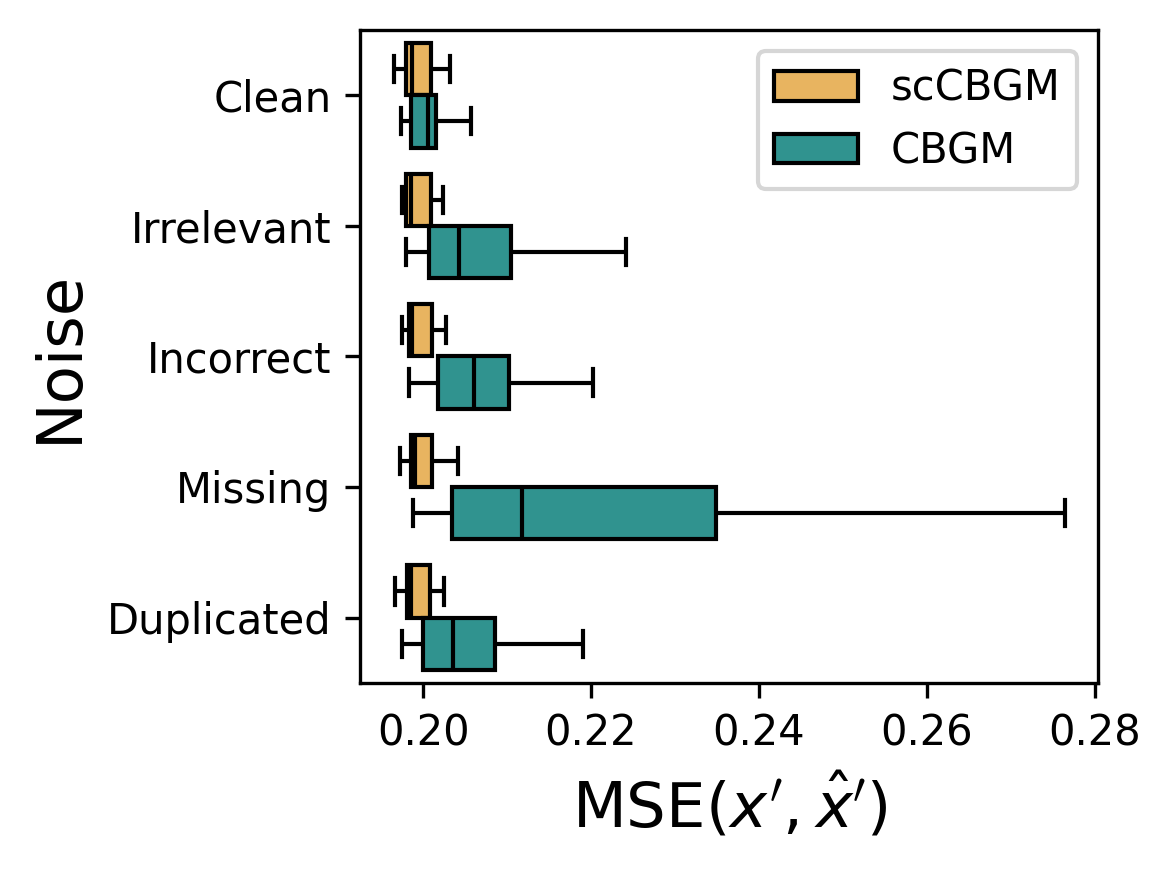

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi = 300)
sns.boxplot(
    data=plot_df,
    x="MSE_intervened",   # was y
    y="modify",           # was x
    hue="model",
    showfliers=False,
    ax=ax,
    palette=cmap,
    orient="h" ,
    boxprops=dict(edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black")
)

ax.legend(loc="upper right")
ax.set_xlabel(r"$\text{MSE}(x',\hat{x}')$", fontsize=15)
ax.set_ylabel("Noise", fontsize=15)
#ax.set_title("Performance")
fig.tight_layout()
plt.show()
